<a href="https://colab.research.google.com/github/positivezenart/Implementation-of-supervised-algorithm-from-scratch/blob/main/Performance_metrics_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute performance metrics for the given Y and Y_score without sklearn

In [ ]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
df_a=pd.read_csv('/content/drive/My Drive/5_a.csv')
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [ ]:
df_a.columns

Index(['y', 'proba'], dtype='object')

In [ ]:
df_a['y_predict'] = df_a.proba.map(lambda x:0 if x<0.5 else 1)
df_a.rename(columns= {'y':'y_act'},inplace = True) #renaming columns
df_a['y_act'] =df_a.y_act.astype('int64') # converting y_act from float datatype to int datatype
df_a.head()

,y_act,proba,y_predict
0,1,0.637387,1
1,1,0.635165,1
2,1,0.766586,1
3,1,0.724564,1
4,1,0.889199,1


In [ ]:
df_a.shape

(10100, 3)

In [ ]:
def confusion_matrix(y_act,y_predict):

  TP= sum((y_act == 1) & (y_predict == 1))
  FP= sum((y_act == 0) & (y_predict == 1))
  TN= sum((y_act == 0) & (y_predict == 0))
  FN= sum((y_act == 1) & (y_predict == 0))

  return TP,FP,TN,FN

In [ ]:
def cal_precision(TP,FP):
  if TP != 0:
     return TP/(TP+FP)
  else:
     return 0


In [ ]:
def cal_recall(TP,FN):
  if TP != 0:
     return TP/(TP+FN)
  else:
     return 0


In [ ]:
def cal_FPR(FP,TN):
  if FP != 0:
     return FP/(FP+TN)
  else:
     return 0

In [ ]:
def compute_F1_score(y_act,y_predict):
  TP,FP,TN,FN = confusion_matrix(y_act,y_predict)
  precision = cal_precision(TP,FP)
  recall = cal_recall(TP,FN)
  F1_score = (2*precision*recall)/(precision+recall)
  return F1_score

In [ ]:
def compute_accuracy(TP,FP,TN,FN):
  accuracy = (TP+TN) /(TP+FP+TN+FN)
  return accuracy

In [ ]:
def compute_AUC(TPR,FPR):
  return np.trapz(TPR,FPR)

In [ ]:
threshold = sorted(np.unique(df_a.proba),reverse=True) 


In [ ]:
#https://stackoverflow.com/questions/61321778/how-to-calculate-tpr-and-fpr-in-python-without-using-sklearn
from tqdm import tqdm

TPR = []
FPR = []
for i in tqdm(threshold):
  df_a['threshold_' + str(i)] =df_a.proba.map(lambda x: 0 if x<i else 1)
  TP,FP,TN,FN = confusion_matrix(df_a.y_act,df_a['threshold_' + str(i)])
  tpr = cal_recall(TP,FN)
  fpr = cal_FPR(FP,TN)
  TPR.append(tpr)
  FPR.append(fpr)
print("AUC_score =",compute_AUC(np.array(TPR), np.array(FPR)))

  1%|          | 92/10100 [00:00<01:47, 93.06it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys
100%|██████████| 10100/10100 [02:02<00:00, 82.59it/s]

AUC_score = 0.48829900000000004


In [ ]:

TP,FP,TN,FN = confusion_matrix(df_a.y_act,df_a.y_predict)
print(f"The values of TP,FP,TN,FN:={TP},{FP},{TN},{FN}")
print("The values of Precision",cal_precision(TP,FP))
print("The values of recall",cal_recall(TP,FN))
print("The values pf F1 SCORE :",compute_F1_score(df_a.y_act,df_a.y_predict))
print("The values of accuracy",compute_accuracy(TP,FP,TN,FN))


The values of TP,FP,TN,FN:=10000,100,0,0
The values of Precision 0.9900990099009901
The values of recall 1.0
The values pf F1 SCORE : 0.9950248756218906
The values of accuracy 0.9900990099009901


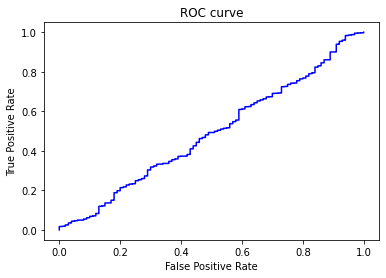

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(FPR, TPR, color='b') 
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
df_b=pd.read_csv('/content/drive/My Drive/5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [ ]:
df_b.columns

Index(['y', 'proba'], dtype='object')

In [ ]:
df_b['y_predict'] = df_b.proba.map(lambda x:0 if x<0.5 else 1)
df_b.rename(columns= {'y':'y_act'},inplace = True) #renaming columns
df_b['y_act'] =df_b.y_act.astype('int64') # converting y_act from float datatype to int datatype
df_b.head()

,y_act,proba,y_predict
0,0,0.281035,0
1,0,0.465152,0
2,0,0.352793,0
3,0,0.157818,0
4,0,0.276648,0


In [ ]:
df_b.shape

(10100, 3)

In [ ]:
TP,FP,TN,FN = confusion_matrix(df_b.y_act,df_b.y_predict)
print(f"The values of TP,FP,TN,FN:={TP},{FP},{TN},{FN}")
print("The values of Precision",cal_precision(TP,FP))
print("The values of recall",cal_recall(TP,FN))
print("The values pf F1 SCORE :",compute_F1_score(df_b.y_act,df_b.y_predict))
print("The values of accuracy",compute_accuracy(TP,FP,TN,FN))

The values of TP,FP,TN,FN:=55,239,9761,45
The values of Precision 0.1870748299319728
The values of recall 0.55
The values pf F1 SCORE : 0.2791878172588833
The values of accuracy 0.9718811881188119


In [ ]:
threshold = sorted(np.unique(df_b.proba),reverse=True) 

In [ ]:
from tqdm import tqdm

TPR = []
FPR = []
for i in tqdm(threshold):
  df_b['threshold_' + str(i)] =df_b.proba.map(lambda x: 0 if x<i else 1)
  TP,FP,TN,FN = confusion_matrix(df_b.y_act,df_b['threshold_' + str(i)])
  tpr = cal_recall(TP,FN)
  fpr = cal_FPR(FP,TN)
  TPR.append(tpr)
  FPR.append(fpr)
print("AUC_score =",compute_AUC(np.array(TPR), np.array(FPR)))

  1%|          | 88/10100 [00:00<01:49, 91.39it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
100%|██████████| 10100/10100 [02:05<00:00, 80.45it/s]

AUC_score = 0.9377570000000001


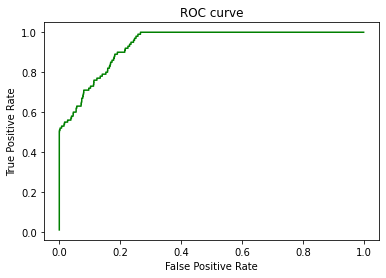

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(FPR, TPR, color='g') 
plt.title('ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
df_c=pd.read_csv('/content/drive/My Drive/5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [ ]:
df_c['y_predict'] = df_c.prob.map(lambda x:0 if x<0.5 else 1)
df_c.rename(columns= {'y':'y_act'},inplace = True) #renaming columns
df_c['y_act'] =df_c.y_act.astype('int64') # converting y_act from float datatype to int datatype
df_c.head()

,y_act,prob,y_predict
0,0,0.458521,0
1,0,0.505037,1
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0


In [ ]:
df_c.shape

(2852, 3)

In [ ]:
from tqdm import tqdm

threshold = sorted(np.unique(df_c.prob),reverse=True) 
A = []
for i in tqdm(threshold):
  df_c['threshold_' + str(i)] =df_c.prob.map(lambda x: 0 if x<i else 1)
  TP,FP,TN,FN = confusion_matrix(df_c.y_act,df_c['threshold_' + str(i)])
  a_ = (500 *FN)+ (100*FP)
  A.append(a_)

best_threshold = threshold[A.index(min(A))]


  3%|▎         | 91/2791 [00:00<00:12, 223.95it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
100%|██████████| 2791/2791 [00:13<00:00, 201.24it/s]


In [ ]:
print("optimal threshold is : ", best_threshold)

optimal threshold is :  0.2300390278970873



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
df_d=pd.read_csv('/content/drive/My Drive/5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [ ]:
df_d['y_predict'] = df_d.pred.map(lambda x:0 if x<0.5 else 1)
df_d.rename(columns= {'y':'y_act'},inplace = True) #renaming columns
df_d['y_act'] =df_d.y_act.astype('int64') # converting y_act from float datatype to int datatype
df_d.head()

,y_act,pred,y_predict
0,101,100.0,1
1,120,100.0,1
2,131,113.0,1
3,164,125.0,1
4,154,152.0,1


In [ ]:
df_c.shape

(2852, 2794)

In [ ]:
#https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/
#https://www.geeksforgeeks.org/python-mean-squared-error/
def compute_MSE(y_act,pred):
  MSE = np.square(np.subtract(y_act,pred)).mean()
  return MSE
print("Mean Square Error:",compute_MSE(df_d.y_act,df_d.pred))

#https://www.askpython.com/python/examples/mape-mean-absolute-percentage-error

def MAPE(y_act,pred):
    y_act, pred = np.array(y_act), np.array(pred)
    return np.mean(np.abs(y_act - pred)) / np.mean(y_act) * 100
    
print("MAPE: ",MAPE(df_d.y_act,df_d.pred))

#https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
#https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/

def r_squared(y_act, pred):
    mean_y_act = np.mean(y_act)
    ss_res = np.square(np.subtract(y_act, pred)).sum() 
    ss_tot = np.square(np.subtract(y_act, mean_y_act)).sum() 
    return 1 - (ss_res/ss_tot)

print("R^2 error: ",r_squared(df_d.y_act,df_d.pred))

Mean Square Error: 177.16569974554707
MAPE:  12.91202994009687
R^2 error:  0.9563582786990937
